In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9667b35e4fe648fd876fec76b4374c1


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bohicon
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | cascavel
Processing Record 6 of Set 1 | tuatapere
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | arlit
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | mahaicony
City not found. Skipping...
Processing Record 16 of Set 1 | nishihara
Processing Record 17 of Set 1 | faya
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | manoel urbano
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | longyearbyen
Pr

Processing Record 36 of Set 4 | kahului
Processing Record 37 of Set 4 | morgan city
Processing Record 38 of Set 4 | sistranda
Processing Record 39 of Set 4 | corsicana
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | fasa
Processing Record 43 of Set 4 | copacabana
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 47 of Set 4 | henties bay
Processing Record 48 of Set 4 | hobart
Processing Record 49 of Set 4 | atuona
Processing Record 50 of Set 4 | babu
Processing Record 1 of Set 5 | bolshaya dzhalga
Processing Record 2 of Set 5 | tuktoyaktuk
Processing Record 3 of Set 5 | padang
Processing Record 4 of Set 5 | takoradi
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | ahipara
Processing Record 7 of Set 5 | aksu
Processing Record 8 of Set 5 | mudbidri
Processing Record 9 of Set 5 | kandrian
Proce

Processing Record 30 of Set 8 | ahuimanu
Processing Record 31 of Set 8 | clyde river
Processing Record 32 of Set 8 | haibowan
City not found. Skipping...
Processing Record 33 of Set 8 | bukama
Processing Record 34 of Set 8 | tiznit
Processing Record 35 of Set 8 | nizwa
Processing Record 36 of Set 8 | carinhanha
Processing Record 37 of Set 8 | vesoul
Processing Record 38 of Set 8 | katsuura
Processing Record 39 of Set 8 | grand-lahou
Processing Record 40 of Set 8 | vardo
Processing Record 41 of Set 8 | half moon bay
Processing Record 42 of Set 8 | puerto del rosario
Processing Record 43 of Set 8 | cap-aux-meules
Processing Record 44 of Set 8 | abnub
Processing Record 45 of Set 8 | menongue
Processing Record 46 of Set 8 | tarudant
City not found. Skipping...
Processing Record 47 of Set 8 | santa maria
Processing Record 48 of Set 8 | wanning
Processing Record 49 of Set 8 | verkhnyaya inta
Processing Record 50 of Set 8 | goundi
Processing Record 1 of Set 9 | egvekinot
Processing Record 2 o

Processing Record 19 of Set 12 | santo antonio do ica
Processing Record 20 of Set 12 | abu samrah
Processing Record 21 of Set 12 | chateau-thierry
Processing Record 22 of Set 12 | san patricio
Processing Record 23 of Set 12 | estacion coahuila
Processing Record 24 of Set 12 | temaraia
City not found. Skipping...
Processing Record 25 of Set 12 | khonuu
City not found. Skipping...
Processing Record 26 of Set 12 | simbahan
Processing Record 27 of Set 12 | urumqi
Processing Record 28 of Set 12 | itarema
Processing Record 29 of Set 12 | aswan
Processing Record 30 of Set 12 | the valley
Processing Record 31 of Set 12 | mandera
Processing Record 32 of Set 12 | aquiraz
Processing Record 33 of Set 12 | hambantota
Processing Record 34 of Set 12 | xiamen
Processing Record 35 of Set 12 | khovu-aksy
Processing Record 36 of Set 12 | victor harbor
Processing Record 37 of Set 12 | monrovia
Processing Record 38 of Set 12 | angoche
Processing Record 39 of Set 12 | san julian
Processing Record 40 of Set 

In [10]:
# try:
#   Do something
# except:
#   print("An exception occurred")

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,82.18,79,33,1.99,US,2021-10-26 22:59:17
1,Punta Arenas,-53.1500,-70.9167,48.31,53,0,24.16,CL,2021-10-26 22:59:18
2,Bohicon,7.1783,2.0667,74.32,95,99,5.44,BJ,2021-10-26 22:59:18
3,Broome,42.2506,-75.8330,54.46,81,90,1.01,US,2021-10-26 22:59:19
4,Cascavel,-24.9558,-53.4553,76.60,41,0,6.91,BR,2021-10-26 22:59:19
5,Tuatapere,-46.1333,167.6833,59.14,83,85,0.87,NZ,2021-10-26 22:59:19
6,Georgetown,5.4112,100.3354,78.73,92,40,1.99,MY,2021-10-26 22:59:20
7,Thompson,55.7435,-97.8558,35.76,100,90,4.61,CA,2021-10-26 22:59:20
8,Pevek,69.7008,170.3133,10.65,93,100,13.02,RU,2021-10-26 22:55:02
9,Arlit,18.7369,7.3853,85.46,12,0,5.30,NE,2021-10-26 22:59:21


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-10-26 22:59:17,22.0752,-159.3190,82.18,79,33,1.99
1,Punta Arenas,CL,2021-10-26 22:59:18,-53.1500,-70.9167,48.31,53,0,24.16
2,Bohicon,BJ,2021-10-26 22:59:18,7.1783,2.0667,74.32,95,99,5.44
3,Broome,US,2021-10-26 22:59:19,42.2506,-75.8330,54.46,81,90,1.01
4,Cascavel,BR,2021-10-26 22:59:19,-24.9558,-53.4553,76.60,41,0,6.91
...,...,...,...,...,...,...,...,...,...
581,Pioner,RU,2021-10-26 23:03:53,55.3166,85.9508,35.04,60,75,15.66
582,Qunduz,AF,2021-10-26 23:03:54,36.7290,68.8570,56.32,45,6,1.79
583,Longkou,CN,2021-10-26 23:03:55,37.6508,120.3286,58.44,50,0,9.46
584,Pandamatenga,BW,2021-10-26 23:03:55,-18.5278,25.6270,77.45,47,78,9.89


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Stephenie\\Desktop\\class\\Mod. 6 Weather Analysis\\WeatherPy': ['.git', '.gitignore', '.ipynb_checkpoints', 'API_practice.ipynb', 'config.py', 'Google_Nearby_Search.ipynb', 'README.md', 'VacationPy.ipynb', 'WeatherPy.ipynb', 'weather_data', 'Weather_Database', '__pycache__']


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

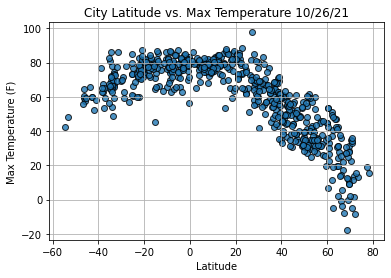

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

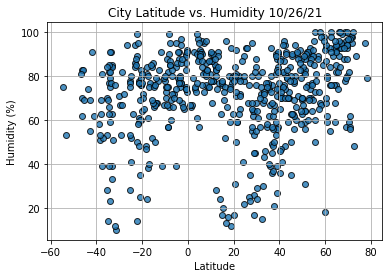

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

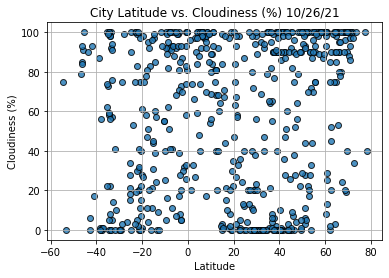

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

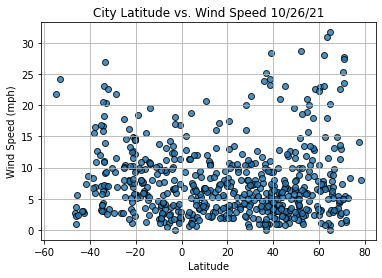

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]

In [23]:
index13

City                    Nishihara
Country                        JP
Date          2021-10-26 22:59:23
Lat                       26.1842
Lng                      127.7558
Max Temp                    72.68
Humidity                       68
Cloudiness                     20
Wind Speed                   8.05
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
581     True
582     True
583     True
584    False
585     True
Name: Lat, Length: 586, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-10-26 22:59:17,22.0752,-159.3190,82.18,79,33,1.99
2,Bohicon,BJ,2021-10-26 22:59:18,7.1783,2.0667,74.32,95,99,5.44
3,Broome,US,2021-10-26 22:59:19,42.2506,-75.8330,54.46,81,90,1.01
6,Georgetown,MY,2021-10-26 22:59:20,5.4112,100.3354,78.73,92,40,1.99
7,Thompson,CA,2021-10-26 22:59:20,55.7435,-97.8558,35.76,100,90,4.61


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

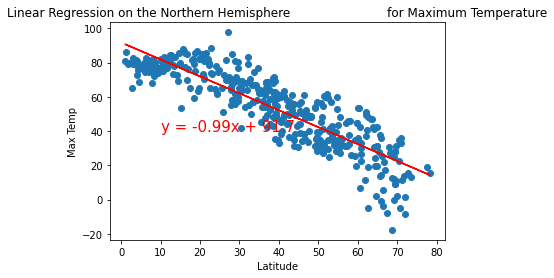

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

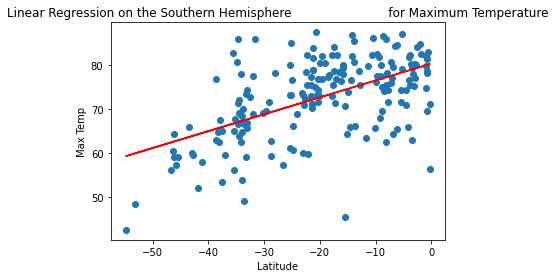

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

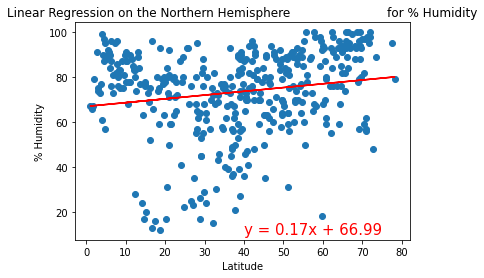

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

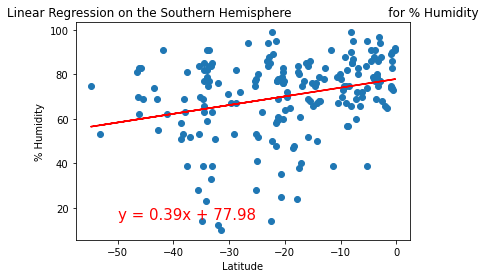

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

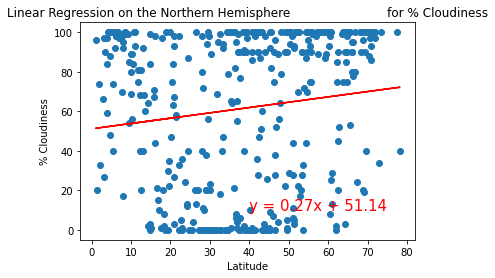

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60)

SyntaxError: unexpected EOF while parsing (<ipython-input-32-6472f2598d7a>, line 7)

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))